# Content

The goal of this ntb is to show how to replace figure level plots of seaborn with individual axes level plots. Check this [seaborn page](https://seaborn.pydata.org/tutorial/function_overview.html) for more information.

* [Relational plots](#Relational-plots)
* [Distribution plots](#Distribution-plots)
* [Regression plots](#Regression-plots)
    * [Regplot](#Regplot)
    * [LMplot](#LMplot)


Good source for playing with seaborn's legend: [https://www.dataforeverybody.com/seaborn-legend-change-location-size/](https://www.dataforeverybody.com/seaborn-legend-change-location-size/)

In [1]:
from cand import Canvas, Vector, Point
# import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Relational plots

https://seaborn.pydata.org/api.html#relational-plots

---
Replace [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) with axes level plots


___
TODO:

2. changes of font and graphics in CanD

#### 1

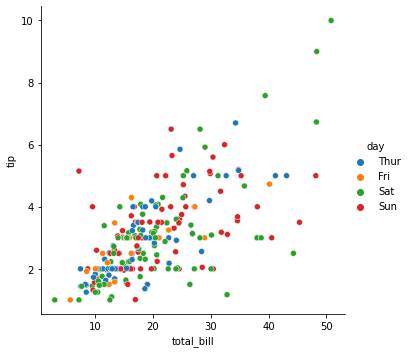

In [2]:
tips = sns.load_dataset("tips")

# Original seaborn plot
sns.relplot(data=tips, x="total_bill", y="tip", hue="day")

## TODO -- changes font size of legend and size of scatter points

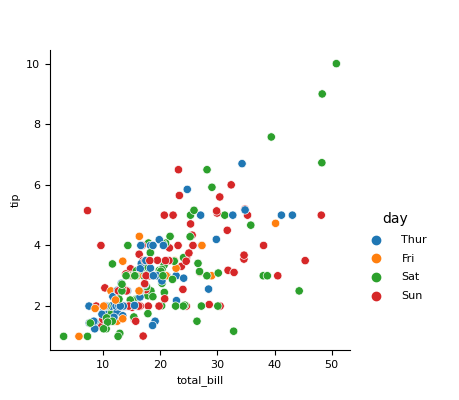

In [3]:
# CanD way

# Create a canvas 6 in x 6 in.
c = Canvas(4.6, 4, "in")

# # Add an axis from the point (0.5,0.5) to (3.5,3.5) in inches.  Name it "scatter"
# c.add_axis("scatter", Point(.5, .5, "in"), Point(3.5, 3.5, "in"))
# # and plot histplot on it
# ax = c.ax("scatter")

# alternative one-liner
ax = c.add_axis("scatter", Point(.5, .5, "in"), Point(3.5, 3.5, "in"))

sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", ax=ax)
# remove the left and top spine
sns.despine(ax=ax)
# Adjust the legend position
ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

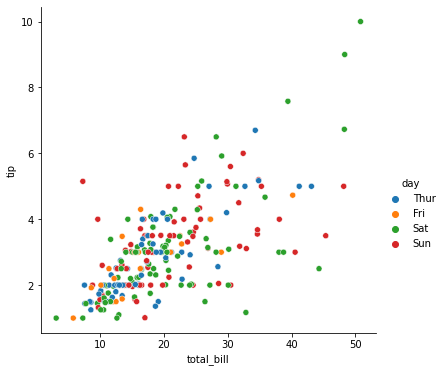

In [4]:
# Matplotlib+Seaborn way (only axes level)

# Create figure and axes
fig, ax = plt.subplots(figsize=(6,6))

# plot the histogram
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust the legend position
ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

#### 2

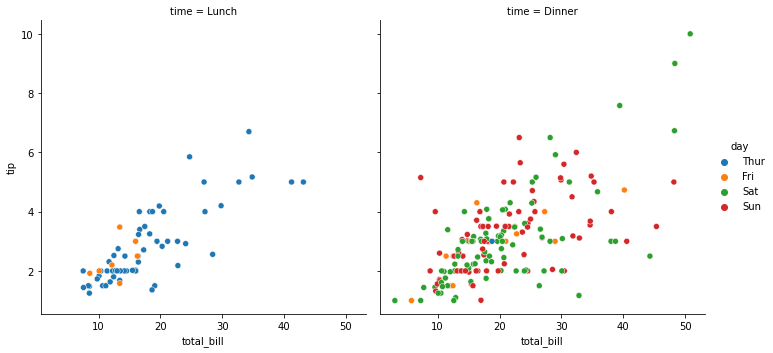

In [5]:
# seaborn
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time")

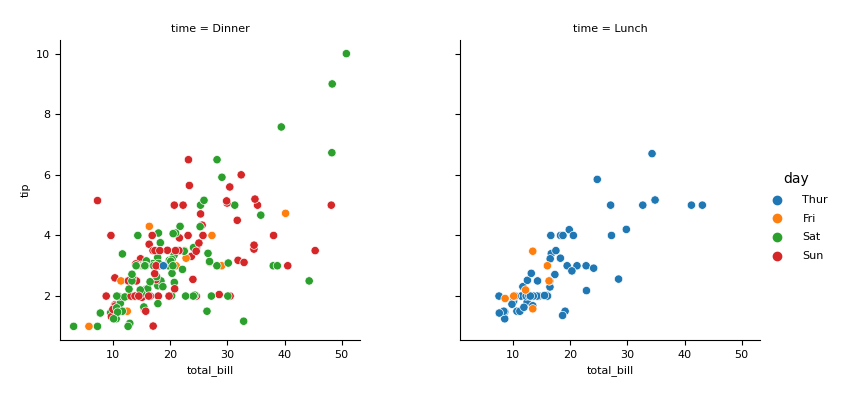

In [6]:
col = "time"
a = tips[col].dropna().unique()

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")

for i, item in enumerate(a):
    ax = c.add_axis(item, Point((4*i+0.6), .6, "in"), Point((4*i+3.6), 3.6, "in"))
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.scatterplot(data=tips[tips[col]==item], x="total_bill", y="tip", hue="day", ax=ax, legend=leg)
    #remove outer right and top spines
    sns.despine(ax=ax)
    # label subplots
    ax.set_title(f"{col} = {item}")
    
    if i>0:
        # sharey, take the first axis and sharey with the last plotted one
        # preferred way
        c.ax(a[i]).sharey(c.ax(a[0]))
        c.ax(a[i]).sharex(c.ax(a[0]))
        # need to rescale all axis
        c.ax(a[i]).autoscale()           
        # Way 2
#         c.axes[a[0]].sharey(c.axes[a[i]])     

        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
        # remove ylabel
        ax.set_ylabel('')
        

# position the legend
ax.legend_.set_bbox_to_anchor((.97, 0.6))
ax.legend_.get_frame().set_edgecolor('none')

# # sharey, Way 3
# c.axes["Dinner"].sharey(c.axes["Lunch"])

c.show()

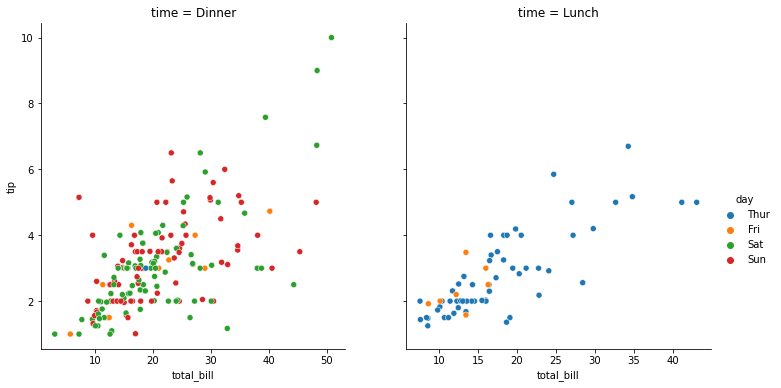

In [7]:
col = "time"
a = tips[col].dropna().unique()

fig, axs = plt.subplots(1,len(a), figsize=(len(a)*6, 6), sharey=True)

for item, ax in zip(a, axs.flatten()):
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.scatterplot(data=tips[tips[col]==item], x="total_bill", y="tip", hue="day", ax=ax, legend=leg)

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{col} = {item}")

ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

#### 3

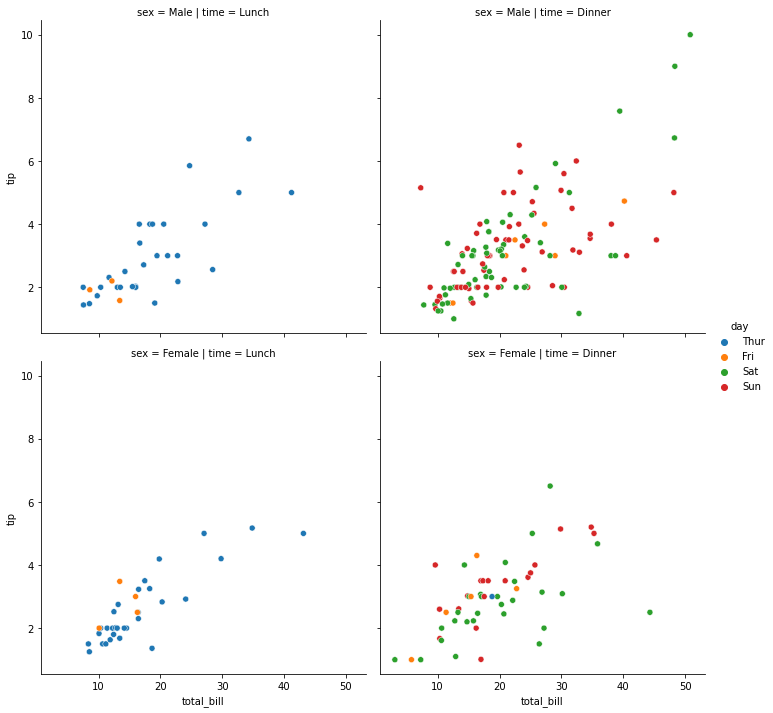

In [8]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", row="sex")

https://github.com/mwshinn/CanD/blob/master/doc/tutorial.rst#grids-of-axes

#### Preferred way

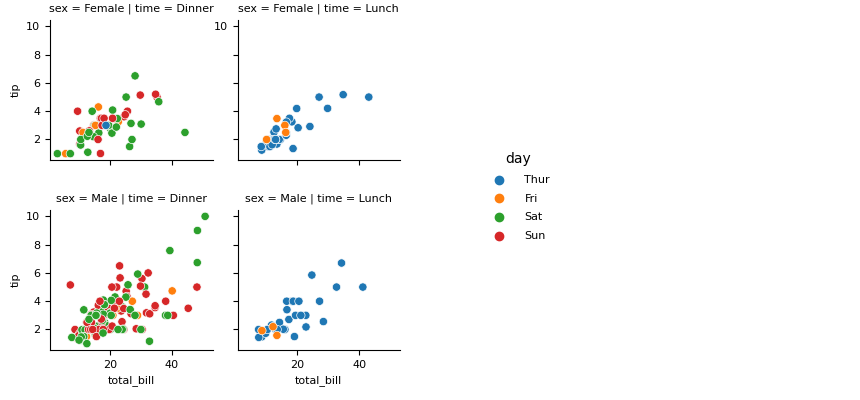

In [9]:
from itertools import product
import numpy as np

# NOTE: the order of seaborns plot is reversed, if one wants to mimic that, one can reverse the order of lists a and b
col = "time"
row = "sex"
a = tips[col].dropna().unique()
b = tips[row].dropna().unique()

# create a list of tuples of all combinations of conditions -- ('condition1', 'condition2')
conditions = list(product(b,a))

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")
# create axis named "0", "1", ... "len(conditions)-1"
c.add_grid([str(x) for x in range(len(conditions))], 2, Point(0.5, 0.5, "in"), Point((2*len(a)), 3.8, "in"), 
           spacing=Vector(.25, .5, "in"), unitname="grid")

# we need to get all the possible combinations of the two categories, split the tuple into row and column vars
for i,(ro,co) in enumerate(conditions):               
    # extract data
    ax = c.axes[str(i)]
    
    # plot only the last legend
    if co == a[-1] and ro == b[-1]:
        leg = True
    else:
        leg = False     

    # plot and select only the relevant data from the dataset
    sns.scatterplot(data=tips.loc[(tips[row]==ro) & (tips[col]==co)], x="total_bill", y="tip", hue="day", ax=ax, legend=leg)

    # Hide the right and top spines
    sns.despine(ax=ax)
    ax.set_title(f"{row} = {ro} | {col} = {co}")
    
    if i>0:
        # sharey, take the first axis and sharey with the last plotted one
        c.ax(str(i)).sharey(c.ax('0'))
        c.ax(str(i)).sharex(c.ax('0'))
        # need to rescale all axis
        c.ax(str(i)).autoscale() 
        
    if i % len(a) != 0:        
        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
#         ax.set_yticklabels([])
        # remove ylabel
        ax.set_ylabel('') 

    if i < len(b):
        # remove ticks from shared y axes
        plt.setp(ax.get_xticklabels(), visible=False)        
#         ax.set_xticklabels([])        
        # remove ylabel
        ax.set_xlabel('')         
    

# set legend position    
ax.legend_.set_bbox_to_anchor((2, 1.5))
ax.legend_.get_frame().set_edgecolor('none')    

# show
c.show()    

#### Another way

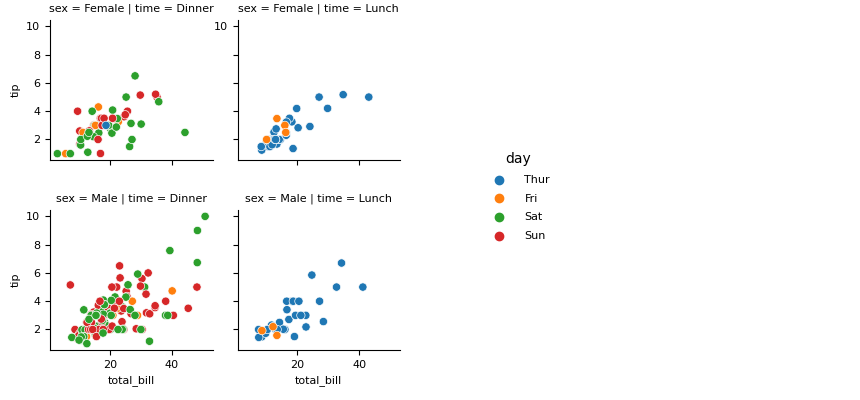

In [10]:
from itertools import product

# NOTE: the order of seaborns plot is reversed, if one wants to mimic that, one can reverse the order of lists a and b
col = "time"
row = "sex"
a = tips[col].dropna().unique()
b = tips[row].dropna().unique()

conditions = [f"{a}|{b}" for a,b in list(product(b,a))]

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")
# c.add_grid(conditions, 2, Point(0.5, 0.5, "in"), Point((2*len(a)), 3.8, "in"), size=Vector(1.5, 1.5, "in"), unitname="grid")
c.add_grid(conditions, 2, Point(0.5, 0.5, "in"), Point((2*len(a)), 3.8, "in"), spacing=Vector(.25, .5, "in"), unitname="grid")

# we need to get all the possible combinations of the two categories
for i,name in enumerate(conditions):               
    # extract data
    ax = c.axes[name]
    ro = name.split('|')[0]
    co = name.split('|')[1]
#     ro = name[0]
#     co = name[1]    
    
    # plot only the last legend
    if co == a[-1] and ro == b[-1]:
        leg = True
    else:
        leg = False     

    # plot
    sns.scatterplot(data=tips.loc[(tips[row]==ro) & (tips[col]==co)], x="total_bill", y="tip", hue="day", ax=ax, legend=leg)

    # Hide the right and top spines
    sns.despine(ax=ax)
    ax.set_title(f"{row} = {ro} | {col} = {co}")
    
    if i>0:
        # sharey, take the first axis and sharey with the last plotted one
        c.ax(conditions[i]).sharey(c.ax(conditions[0]))
        c.ax(conditions[i]).sharex(c.ax(conditions[0]))
        # need to rescale all axis
        c.ax(conditions[i]).autoscale() 
        
    if i % len(a) != 0:        
        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
#         ax.set_yticklabels([])
        # remove ylabel
        ax.set_ylabel('') 

    if i < len(b):
        # remove ticks from shared y axes
        plt.setp(ax.get_xticklabels(), visible=False)        
#         ax.set_xticklabels([])        
        # remove ylabel
        ax.set_xlabel('')         
    

# set legend position    
ax.legend_.set_bbox_to_anchor((2, 1.5))
ax.legend_.get_frame().set_edgecolor('none')    

# show
c.show()    

#### Original way

notice that the `ax.set_yticklabels([])` removes the labels even if not calledfor this `i`

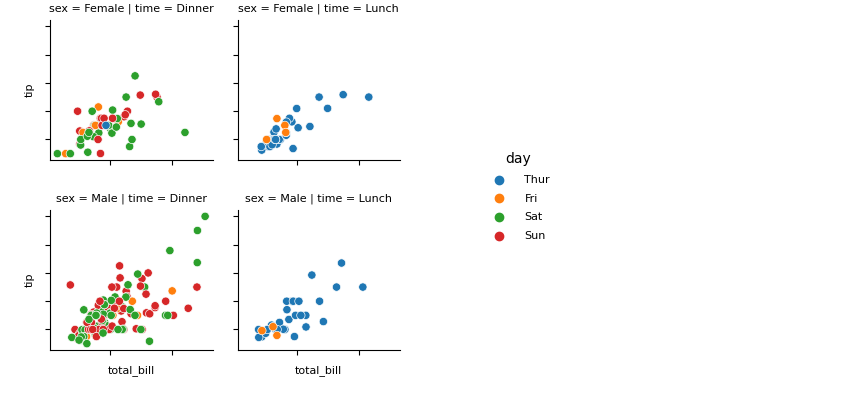

In [11]:
from itertools import product

# NOTE: the order of seaborns plot is reversed, if one wants to mimic that, one can reverse the order of lists a and b
col = "time"
row = "sex"
a = tips[col].dropna().unique()
b = tips[row].dropna().unique()

conditions = [x[0]+"|"+x[1] for x in product(b, a)]

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")
# c.add_grid(conditions, 2, Point(0.5, 0.5, "in"), Point((2*len(a)), 3.8, "in"), size=Vector(1.5, 1.5, "in"), unitname="grid")
c.add_grid(conditions, 2, Point(0.5, 0.5, "in"), Point((2*len(a)), 3.8, "in"), spacing=Vector(.25, .5, "in"), unitname="grid")

# we need to get all the possible combinations of the two categories
for i,name in enumerate(conditions):               
    # extract data
    ax = c.axes[name]
    ro = name.split('|')[0]
    co = name.split('|')[1]
    
    # plot only the last legend
    if co == a[-1] and ro == b[-1]:
        leg = True
    else:
        leg = False     

    # plot
    sns.scatterplot(data=tips.loc[(tips[row]==ro) & (tips[col]==co)], x="total_bill", y="tip", hue="day", ax=ax, legend=leg)

    # Hide the right and top spines
    sns.despine(ax=ax)
    ax.set_title(f"{row} = {ro} | {col} = {co}")
    
    if i>0:
        # sharey, take the first axis and sharey with the last plotted one
        c.ax(conditions[i]).sharey(c.ax(conditions[0]))
        c.ax(conditions[i]).sharex(c.ax(conditions[0]))
        # need to rescale all axis
        c.ax(conditions[i]).autoscale() 
        
    if i % len(a) != 0:        
        # remove ticks from shared y axes
#         plt.setp(ax.get_yticklabels(), visible=False)
        ax.set_yticklabels([])
        # remove ylabel
        ax.set_ylabel('') 

    if i < len(b):
        # remove ticks from shared y axes
#         plt.setp(ax.get_xticklabels(), visible=False)        
        ax.set_xticklabels([])        
        # remove ylabel
        ax.set_xlabel('')         
    

# set legend position    
ax.legend_.set_bbox_to_anchor((2, 1.5))
ax.legend_.get_frame().set_edgecolor('none')    

# show
c.show()    

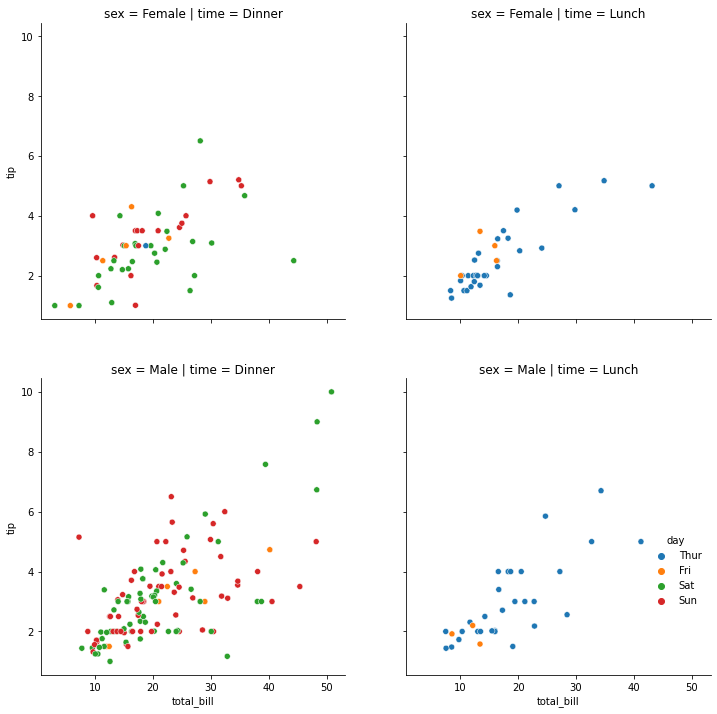

In [12]:
from itertools import product

# matplotlib

# NOTE: the order of seaborns plot is reversed, if one wants to mimic that, one can reverse the order of lists a and b
col = "time"
row = "sex"
a = tips[col].dropna().unique()
b = tips[row].dropna().unique()

fig, axs = plt.subplots(len(b),len(a), figsize=(len(a)*6, len(b)*6), sharey=True, sharex=True)

# we need to get all the possible combinations of the two categories
for (ro, co), ax in zip(list(product(b, a)), axs.flatten()):    
    # plot only the last legend
    if co == a[-1] and ro == b[-1]:
        leg = True
    else:
        leg = False    
    
    sns.scatterplot(data=tips.loc[(tips[row]==ro) & (tips[col]==co)], x="total_bill", y="tip", hue="day", ax=ax, legend=leg)

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{row} = {ro} | {col} = {co}")

ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

#### 4 

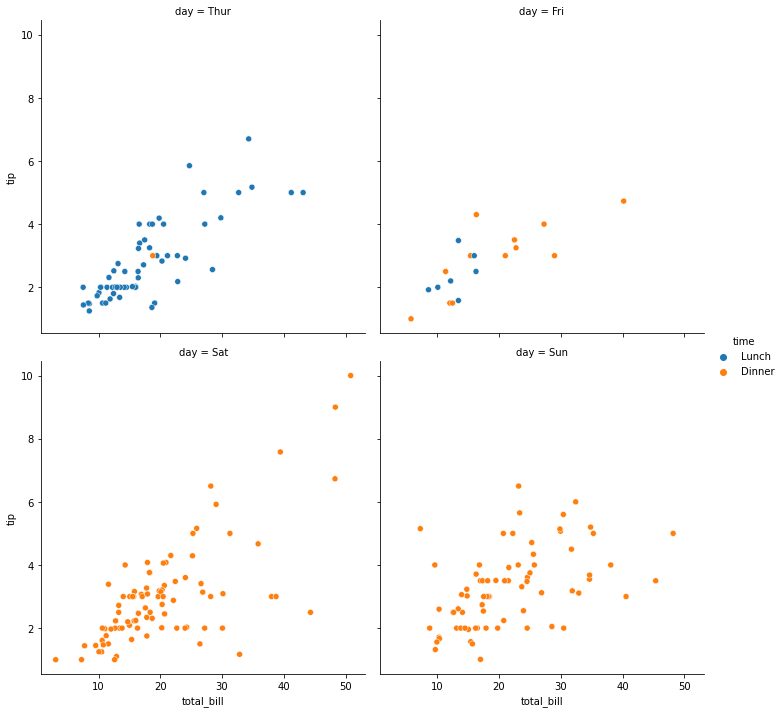

In [13]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="time", col="day", col_wrap=2)

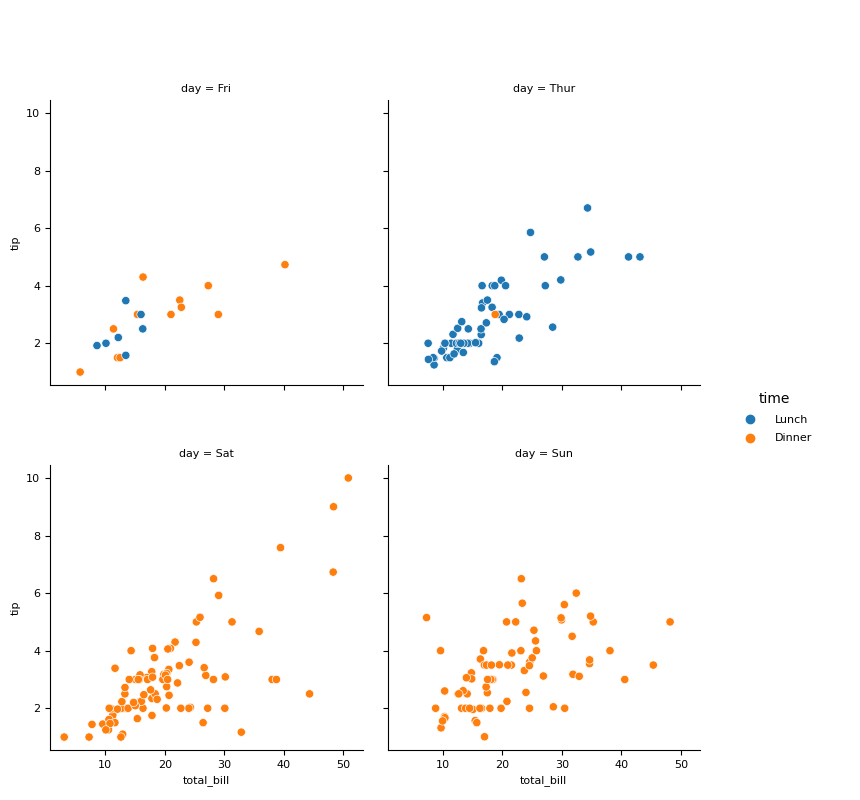

In [14]:
from itertools import product
import numpy as np


# NOTE: the order of seaborns plot is reversed, if one wants to mimic that, one can reverse the order of lists a and b
col = "day"
col_wrap=2
a = tips[col].dropna().unique()[::-1]


# TODO -- len(a)//col_wrap is not optimal, it wants num of rows as arg and we have col_wrap - num of columns

# CanD
c = Canvas((len(a)*4//col_wrap+0.6), 4*col_wrap, "in")
# create axis named "0", "1", ... "len(conditions)-1"
c.add_grid([str(x) for x in range(len(a))], len(a)//col_wrap, Point(0.5, 0.5, "in"), Point(len(a)*3.5//col_wrap, len(a)*3.5//col_wrap, "in"), 
           spacing=Vector(.25, .8, "in"), unitname="grid")

# we need to get all the possible combinations of the two categories, split the tuple into row and column vars
for i,co in enumerate(a):               
    # extract data
    ax = c.axes[str(i)]
    
    # plot only the last legend
    if co == a[-1]:
        leg = True
    else:
        leg = False     

    # plot and select only the relevant data from the dataset
    sns.scatterplot(data=tips.loc[tips[col]==co], x="total_bill", y="tip", hue="time", ax=ax, legend=leg)

    # Hide the right and top spines
    sns.despine(ax=ax)
    ax.set_title(f"{col} = {co}")
    
    if i>0:
        # sharey, take the first axis and sharey with the last plotted one
        c.ax(str(i)).sharey(c.ax('0'))
        c.ax(str(i)).sharex(c.ax('0'))
        # need to rescale all axis
        c.ax(str(i)).autoscale() 
        
    if i % col_wrap != 0:
        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
#         ax.set_yticklabels([])
        # remove ylabel
        ax.set_ylabel('') 

    if i < col_wrap:
        # remove ticks from shared y axes
        plt.setp(ax.get_xticklabels(), visible=False)        
#         ax.set_xticklabels([])        
        # remove ylabel
        ax.set_xlabel('')         
    

# set legend position    
ax.legend_.set_bbox_to_anchor((1.4, 1.3))
ax.legend_.get_frame().set_edgecolor('none')    

# show
c.show()    

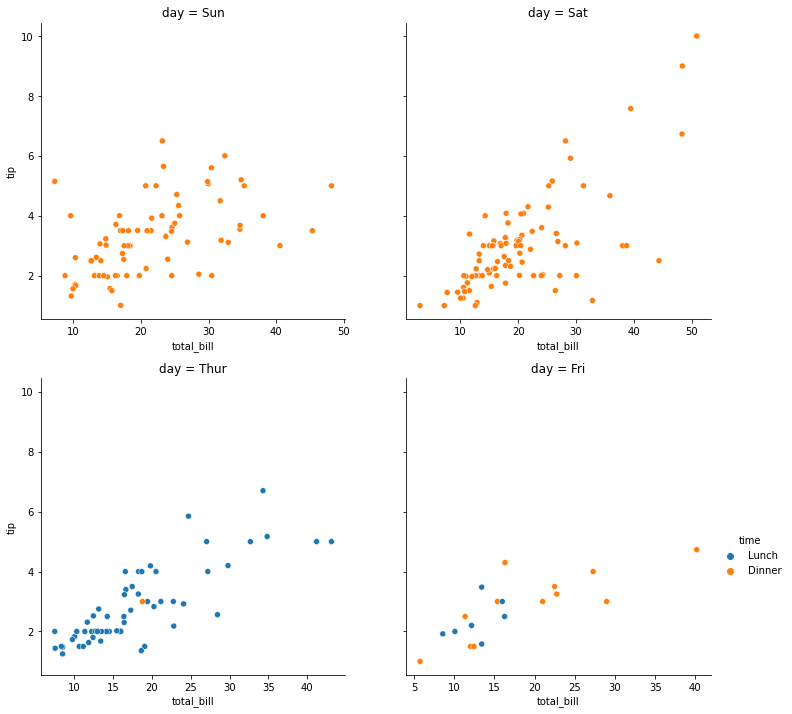

In [15]:
col = "day"
a = tips[col].dropna().unique()
col_wrap=2

fig, axs = plt.subplots(col_wrap,len(a)//col_wrap, figsize=(len(a)*6//col_wrap, 6*col_wrap), sharey=True)

for item, ax in zip(a, axs.flatten()):
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.scatterplot(data=tips[tips[col]==item], x="total_bill", y="tip", hue="time", ax=ax, legend=leg)

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{col} = {item}")

ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

#### 5

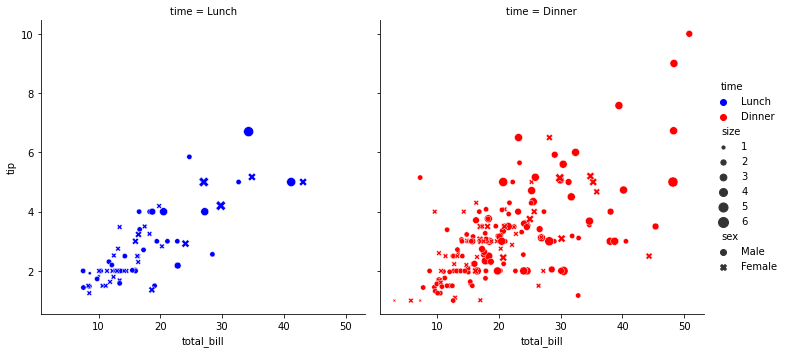

In [16]:
sns.relplot(
    data=tips, x="total_bill", y="tip", col="time",
    hue="time", size="size", style="sex",
    palette=["b", "r"], sizes=(10, 100)
)

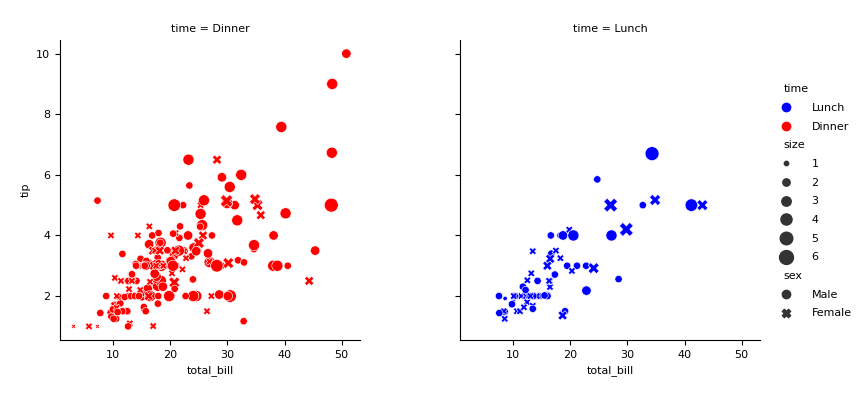

In [17]:
col = "time"
a = tips[col].dropna().unique()

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")

for i, item in enumerate(a):
    ax = c.add_axis(item, Point((4*i+0.6), .6, "in"), Point((4*i+3.6), 3.6, "in"))
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.scatterplot(
        data=tips[tips[col]==item], x="total_bill", y="tip",
        hue="time", size="size", style="sex",
        palette=["b", "r"], sizes=(10, 100), ax=ax, legend=leg
    )

    sns.despine(ax=ax)
    
    ax.set_title(f"{col} = {item}")
    
    if i>0:
        # sharey, take the first axis and sharey with the last plotted one
        c.ax(a[i]).sharey(c.ax(a[0]))
        c.ax(a[i]).sharex(c.ax(a[0]))
        # need to rescale all axis
        c.ax(a[i]).autoscale()             

        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
        # remove ylabel
        ax.set_ylabel('')    

# position the legend
ax.legend_.set_bbox_to_anchor((1, 0.9))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

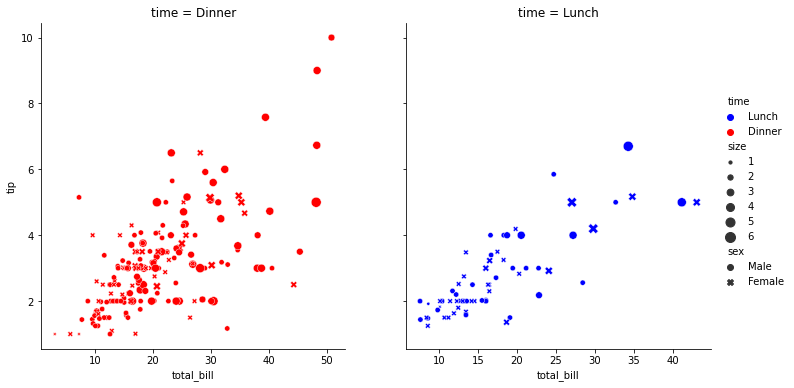

In [18]:
col = "time"
a = tips[col].dropna().unique()

fig, axs = plt.subplots(1,len(a), figsize=(len(a)*6, 6), sharey=True)

for item, ax in zip(a, axs.flatten()):
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.scatterplot(
        data=tips[tips[col]==item], x="total_bill", y="tip",
        hue="time", size="size", style="sex",
        palette=["b", "r"], sizes=(10, 100), ax=ax, legend=leg
    )

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{col} = {item}")

ax.legend_.set_bbox_to_anchor((1, .8))
ax.legend_.get_frame().set_edgecolor('none')

#### 6

In [19]:
fmri = sns.load_dataset("fmri")

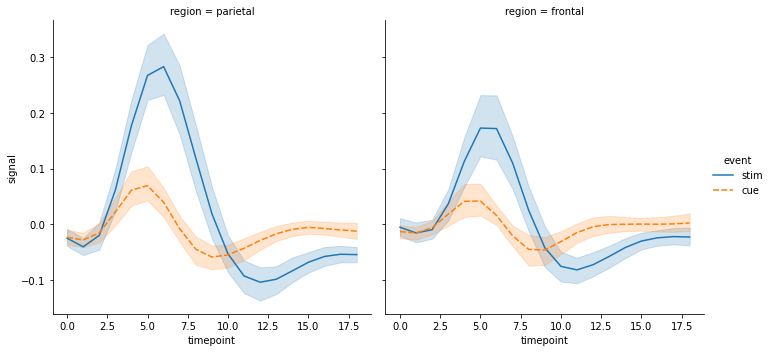

In [20]:
sns.relplot(
    data=fmri, x="timepoint", y="signal", col="region",
    hue="event", style="event", kind="line",
)


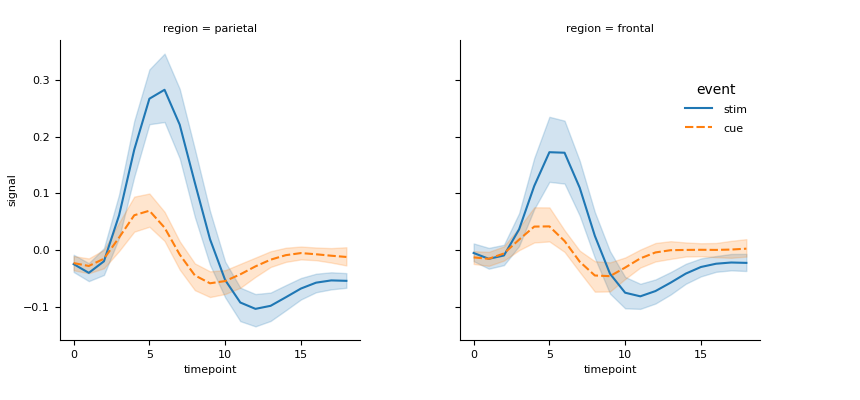

In [21]:
col = "region"
a = fmri[col].dropna().unique()

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")

for i, item in enumerate(a):
    ax = c.add_axis(item, Point((4*i+0.6), .6, "in"), Point((4*i+3.6), 3.6, "in"))
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.lineplot(
        data=fmri[fmri[col]==item], x="timepoint", y="signal",
        hue="event", style="event", ax=ax, legend=leg
    )

    sns.despine(ax=ax)
    
    ax.set_title(f"{col} = {item}")
    
    if i>0:
        # sharey, take the first axis and sharey with the last plotted one
        c.ax(a[i]).sharey(c.ax(a[0]))
        c.ax(a[i]).sharex(c.ax(a[0]))
        # need to rescale all axis
        c.ax(a[i]).autoscale()           

        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
        # remove ylabel
        ax.set_ylabel('')     

# position the legend
ax.legend_.set_bbox_to_anchor((1, 0.9))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

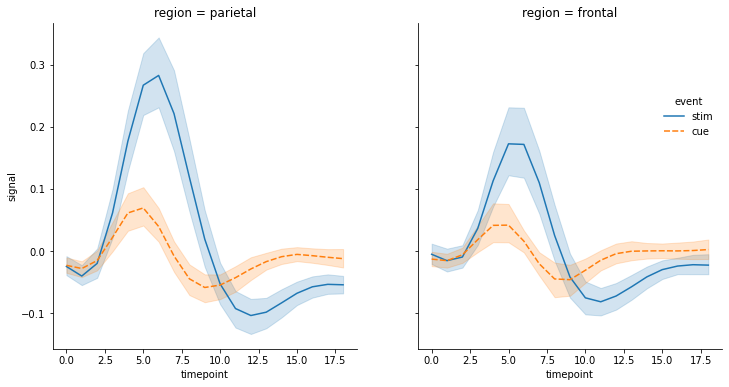

In [22]:
col = "region"
a = fmri[col].dropna().unique()

fig, axs = plt.subplots(1,len(a), figsize=(len(a)*6, 6), sharey=True)

for item, ax in zip(a, axs.flatten()):
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.lineplot(
        data=fmri[fmri[col]==item], x="timepoint", y="signal",
        hue="event", style="event", ax=ax, legend=leg
    )

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{col} = {item}")

ax.legend_.set_bbox_to_anchor((1, .8))
ax.legend_.get_frame().set_edgecolor('none')

#### 7 

Just changing the aspect and the ratio, can be done simply by changing the sizes of the figure in matplotlib or by point coordinates in CanD

#### 8

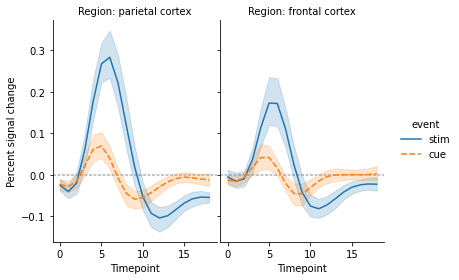

In [23]:
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.7, kind="line"
)
(g.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Timepoint", "Percent signal change")
  .set_titles("Region: {col_name} cortex")
  .tight_layout(w_pad=0))

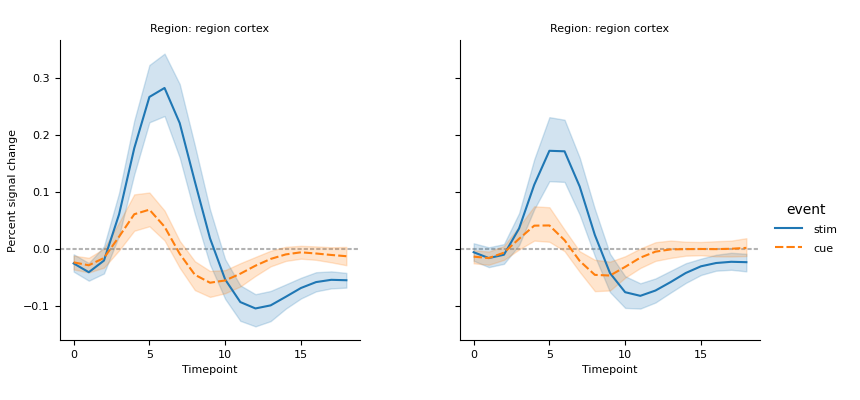

In [24]:
col = "region"
a = fmri[col].dropna().unique()

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")

for i, item in enumerate(a):
    ax = c.add_axis(item, Point((4*i+0.6), .6, "in"), Point((4*i+3.6), 3.6, "in"))
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.lineplot(
        data=fmri[fmri[col]==item], x="timepoint", y="signal",
        hue="event", style="event", ax=ax, legend=leg
    )

    sns.despine(ax=ax)
    if i>0:
        # sharey, take the first axis and sharey with the last plotted one
        c.ax(a[i]).sharey(c.ax(a[0]))
        c.ax(a[i]).sharex(c.ax(a[0]))
        # need to rescale all axis
        c.ax(a[i]).autoscale()   

        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
        # remove ylabel
        ax.set_ylabel('')     

    # Add a gorizontal line
    ax.axhline(y=0, color=".7", dashes=(2, 1), zorder=0)
    
    # Add axis titles
    ax.set_xlabel("Timepoint")
    ax.set_title(f"Region: {col} cortex")
    
    if item == a[0]:
        ax.set_ylabel("Percent signal change")
    else:
        ax.set_ylabel("")

# position the legend
ax.legend_.set_bbox_to_anchor((1.3, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

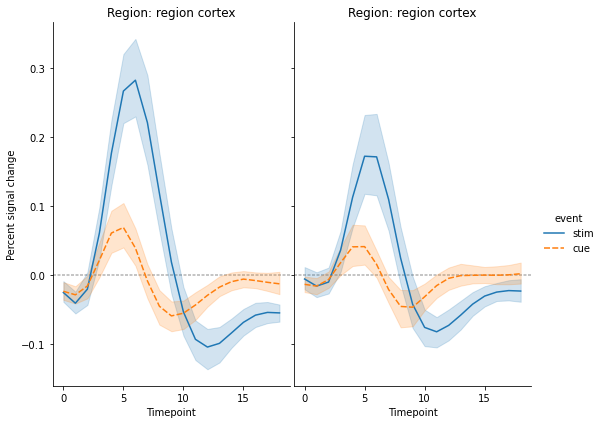

In [25]:
col = "region"
a = fmri[col].dropna().unique()
aspect=.7

fig, axs = plt.subplots(1,len(a), figsize=(len(a)*6*aspect, 6), sharey=True)

for item, ax in zip(a, axs.flatten()):
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.lineplot(
        data=fmri[fmri[col]==item], x="timepoint", y="signal",
        hue="event", style="event", ax=ax, legend=leg
    )

    # Add a gorizontal line
    ax.axhline(y=0, color=".7", dashes=(2, 1), zorder=0)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Add axis titles
    ax.set_xlabel("Timepoint")
    ax.set_title(f"Region: {col} cortex")
    
    if item == a[0]:
        ax.set_ylabel("Percent signal change")

ax.legend_.set_bbox_to_anchor((1.3, .5))
ax.legend_.get_frame().set_edgecolor('none')
plt.tight_layout(w_pad=0)

#### 9

In [26]:
flights_wide = sns.load_dataset("flights").pivot("year", "month", "passengers")

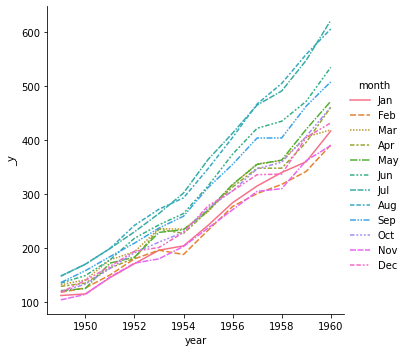

In [27]:
sns.relplot(data=flights_wide, kind="line")

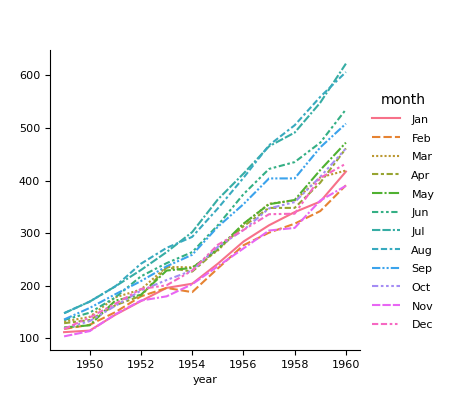

In [28]:
# CanD way

# Create a canvas 6 in x 6 in.
c = Canvas(4.6, 4, "in")

ax = c.add_axis("lineplot", Point(.5, .5, "in"), Point(3.6, 3.5, "in"))

# plot the lineplot
sns.lineplot(data=flights_wide, ax=ax)
# remove the left and top spine
sns.despine(ax=ax)
# adjust legend place
ax.legend_.set_bbox_to_anchor((1, .9))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

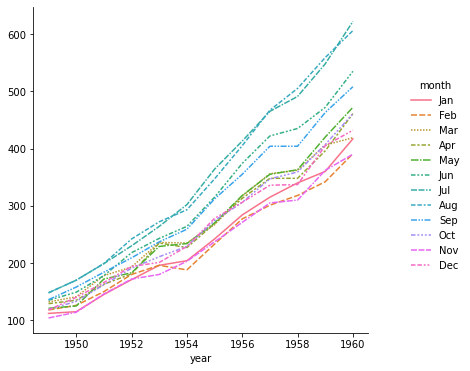

In [29]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(6,6))

# plot the lineplot
sns.lineplot(data=flights_wide, ax=ax)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# adjust legend place
ax.legend_.set_bbox_to_anchor((1.3, .8))
ax.legend_.get_frame().set_edgecolor('none')

--------

# Distribution plots

https://seaborn.pydata.org/api.html#distribution-api

[Content](#Content) (top)

---
Replace [displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) with axes level plots

#### 1

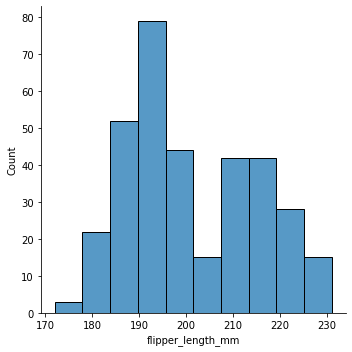

In [30]:
# Original seaborn plot
penguins = sns.load_dataset("penguins")
sns.displot(data=penguins, x="flipper_length_mm")

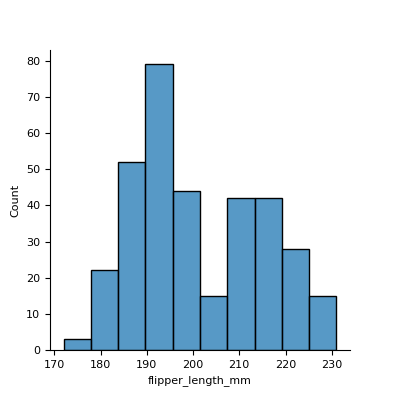

In [31]:
# CanD way

# Create a canvas 6 in x 6 in.
c = Canvas(4, 4, "in")

# # Add an axis from the point (0.5,0.5) to (3.5,3.5) in inches.  Name it "histplot"
# c.add_axis("histplot", Point(.5, .5, "in"), Point(3.5, 3.5, "in"))
# # and plot histplot on it
# ax = c.ax("histplot")

# alternative one-liner
ax = c.add_axis("histplot", Point(.5, .5, "in"), Point(3.5, 3.5, "in"))

sns.histplot(data=penguins, x="flipper_length_mm", ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

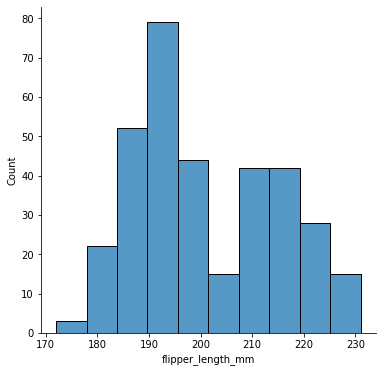

In [32]:
# Matplotlib+Seaborn way (only axes level)

# Create figure and axes
fig, ax = plt.subplots(figsize=(6,6))

# plot the histogram
sns.histplot(data=penguins, x="flipper_length_mm")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#### 2

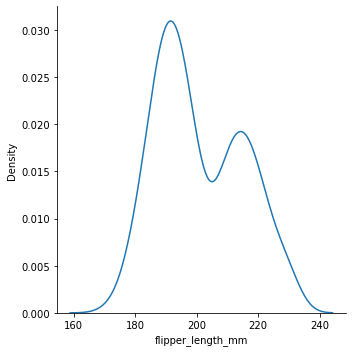

In [33]:
# seaborn
sns.displot(data=penguins, x="flipper_length_mm", kind="kde")

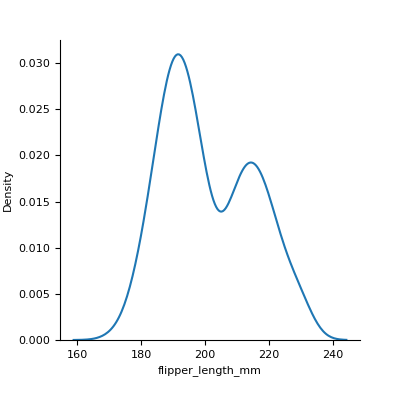

In [34]:
# CanD

c = Canvas(4, 4, "in")

ax = c.add_axis("kdeplot", Point(.6, .6, "in"), Point(3.6, 3.6, "in"))

sns.kdeplot(data=penguins, x="flipper_length_mm", ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

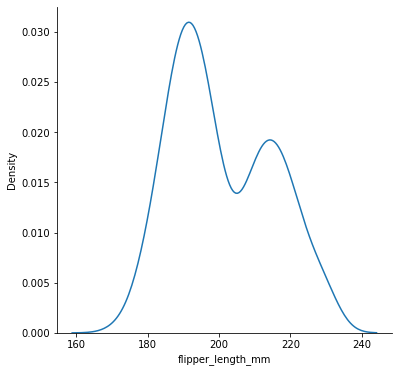

In [35]:
# Matplotlib
fig, ax = plt.subplots(figsize=(6,6))

sns.kdeplot(data=penguins, x="flipper_length_mm", ax=ax)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#### 3

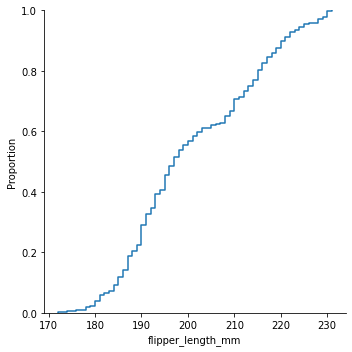

In [36]:
sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf")

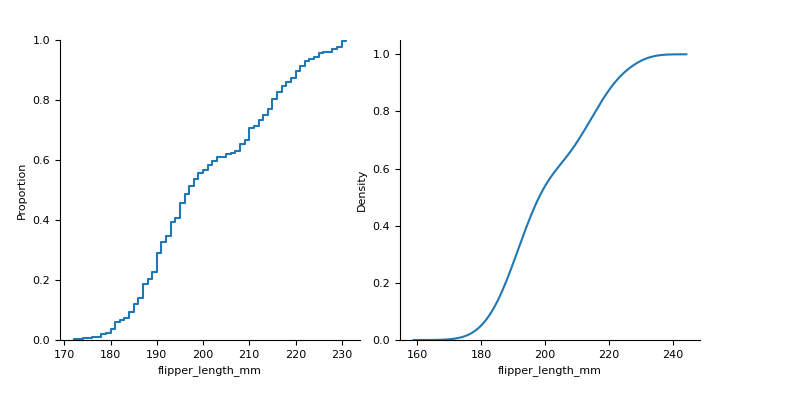

In [37]:
# CanD

c = Canvas(8, 4, "in")

# ECDF plot
ax1 = c.add_axis("ecdfplot", Point(.6, .6, "in"), Point(3.6, 3.6, "in"))

sns.ecdfplot(data=penguins, x="flipper_length_mm", ax=ax1)
sns.despine(ax=ax1)

# KDE plot
ax2 = c.add_axis("kdeplot", Point(4, .6, "in"), Point(7, 3.6, "in"))

sns.kdeplot(data=penguins, x="flipper_length_mm", cumulative=True, ax=ax2)
sns.despine(ax=ax2)

c.show()

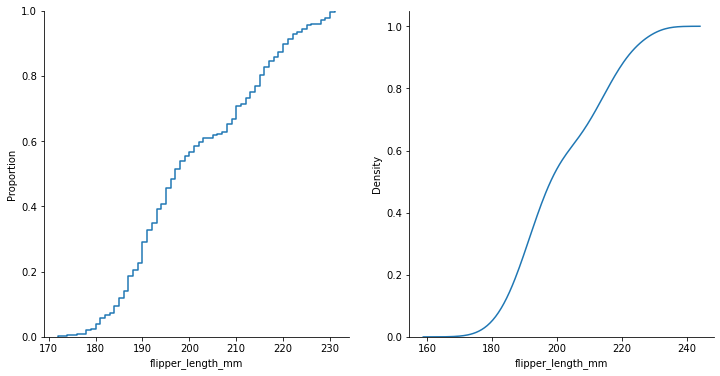

In [38]:
# matplotlib
fig, axs = plt.subplots(1,2, figsize=(12,6))

sns.ecdfplot(data=penguins, x="flipper_length_mm", ax=axs[0])
sns.kdeplot(data=penguins, x="flipper_length_mm", cumulative=True, ax=axs[1])

for ax in axs:
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

#### 4

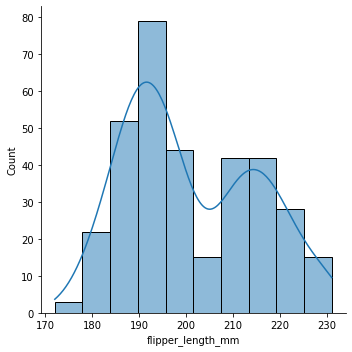

In [39]:
# seaborn
sns.displot(data=penguins, x="flipper_length_mm", kde=True)

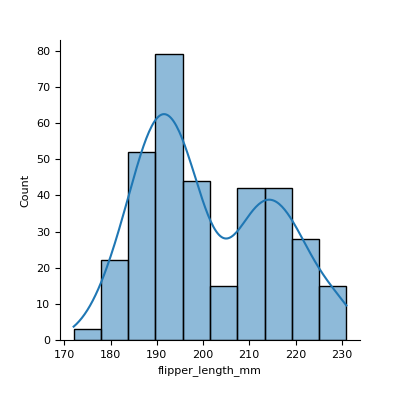

In [40]:
# CanD

c = Canvas(4, 4, "in")

ax = c.add_axis("kdeplot", Point(.6, .6, "in"), Point(3.6, 3.6, "in"))

sns.histplot(data=penguins, x="flipper_length_mm", kde=True, ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

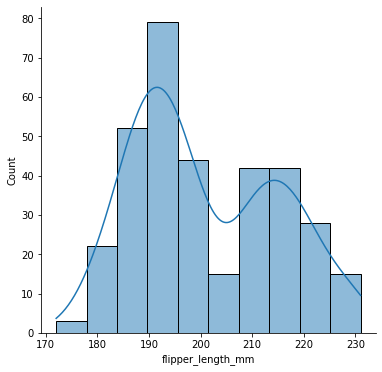

In [41]:
# matplotlib
fig, ax = plt.subplots(figsize=(6,6))

sns.histplot(data=penguins, x="flipper_length_mm", kde=True)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


#### 5

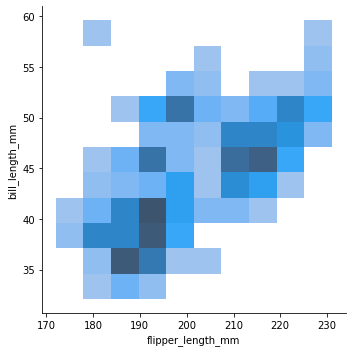

In [42]:
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm")

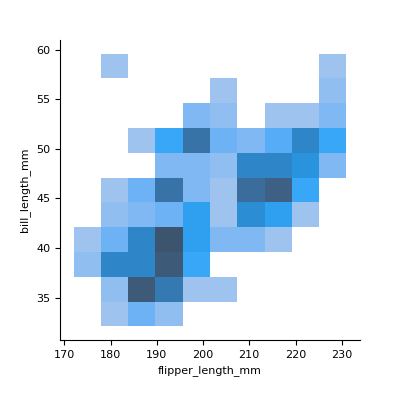

In [43]:
# CanD
c = Canvas(4, 4, "in")

ax = c.add_axis("2Dplot", Point(.6, .6, "in"), Point(3.6, 3.6, "in"))

sns.histplot(penguins, x="flipper_length_mm", y="bill_length_mm", ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

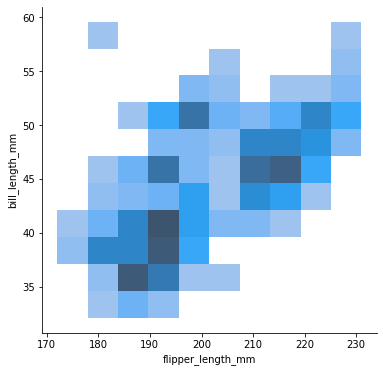

In [44]:
fig, ax = plt.subplots(figsize=(6,6))

sns.histplot(penguins, x="flipper_length_mm", y="bill_length_mm")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


#### 6

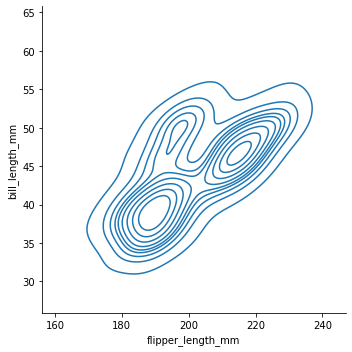

In [45]:
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind="kde")

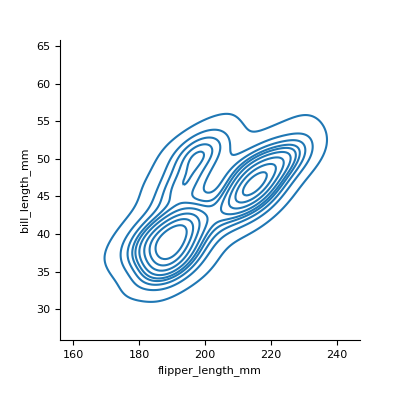

In [46]:
# CanD
c = Canvas(4, 4, "in")

ax = c.add_axis("2Dkdeplot", Point(.6, .6, "in"), Point(3.6, 3.6, "in"))

sns.kdeplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

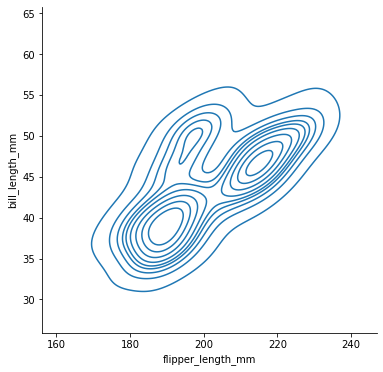

In [47]:
# matplotlib
fig, ax = plt.subplots(figsize=(6,6))

sns.kdeplot(data=penguins, x="flipper_length_mm", y="bill_length_mm")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#### 7

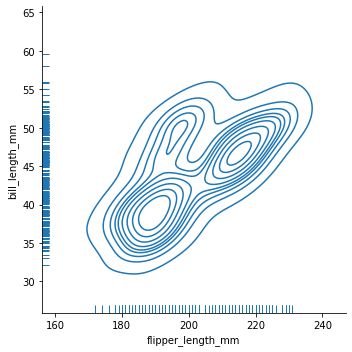

In [48]:
g = sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind="kde", rug=True)

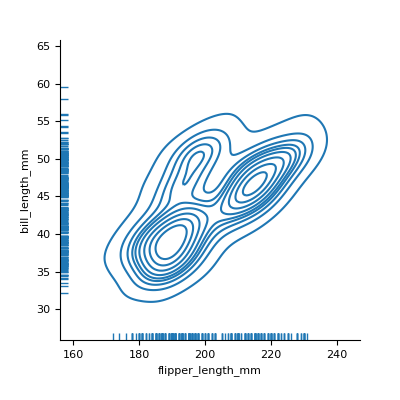

In [49]:
# get default seaborn colour
colour = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

# CanD
c = Canvas(4, 4, "in")

ax = c.add_axis("2Dkdeplot", Point(.6, .6, "in"), Point(3.6, 3.6, "in"))

sns.kdeplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", color=colour, ax=ax)
sns.rugplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", color=colour, ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

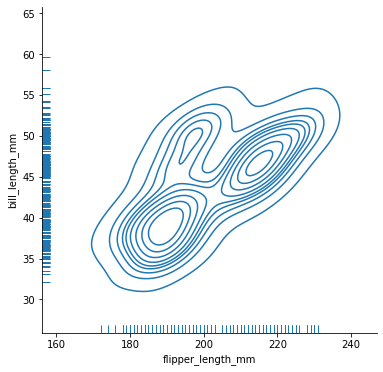

In [50]:
# get default seaborn colour
colour = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765) #g._colors[0]

fig, ax = plt.subplots(figsize=(6,6))

sns.kdeplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", color=colour)
sns.rugplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", color=colour)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#### 8

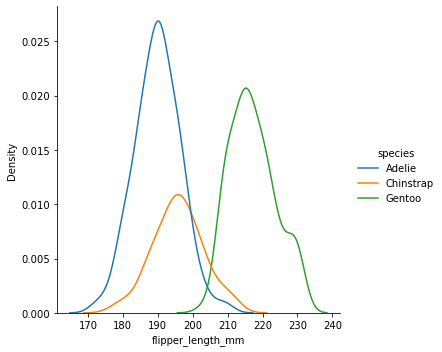

In [51]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde")

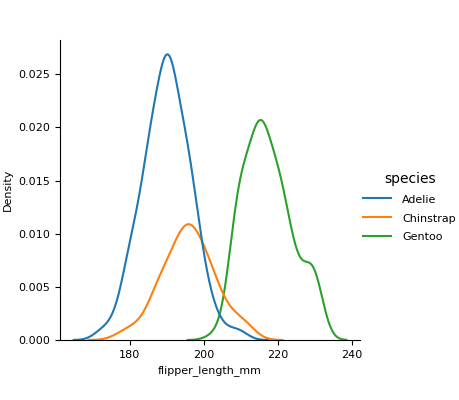

In [52]:
# CanD
c = Canvas(4.6, 4, "in")

ax = c.add_axis("2Dkdeplot", Point(.6, .6, "in"), Point(3.6, 3.6, "in"))

sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

# position the legend
ax.legend_.set_bbox_to_anchor((.97, 0.6))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

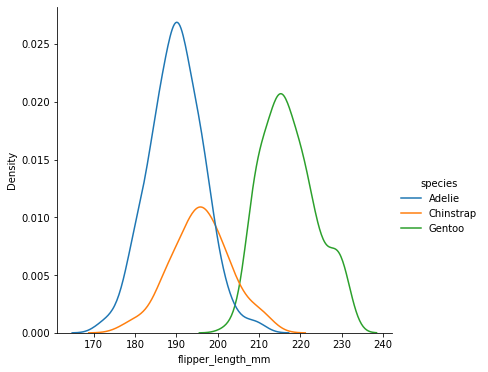

In [53]:
fig, ax = plt.subplots(figsize=(6,6))

sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", ax=ax)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

#### 9

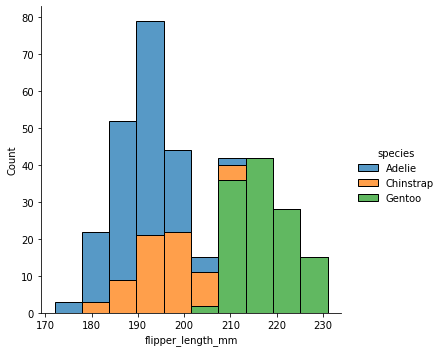

In [54]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

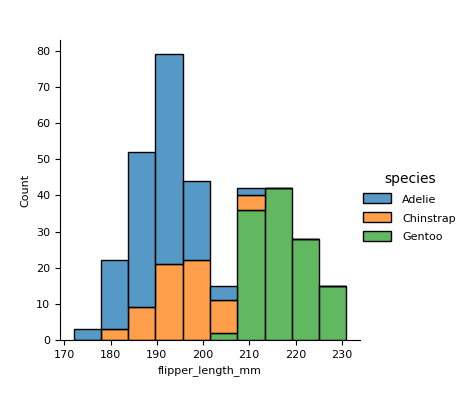

In [55]:
# CanD
c = Canvas(4.6, 4, "in")

ax = c.add_axis("2Dkdeplot", Point(.6, .6, "in"), Point(3.6, 3.6, "in"))

sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

# position the legend
ax.legend_.set_bbox_to_anchor((.97, 0.6))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

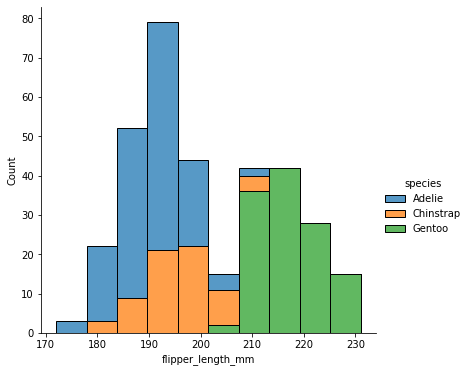

In [56]:
fig, ax = plt.subplots(figsize=(6,6))

sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

#### 10

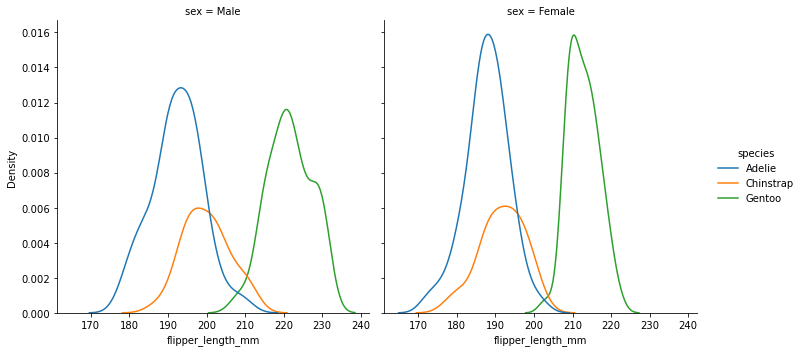

In [57]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="sex", kind="kde")

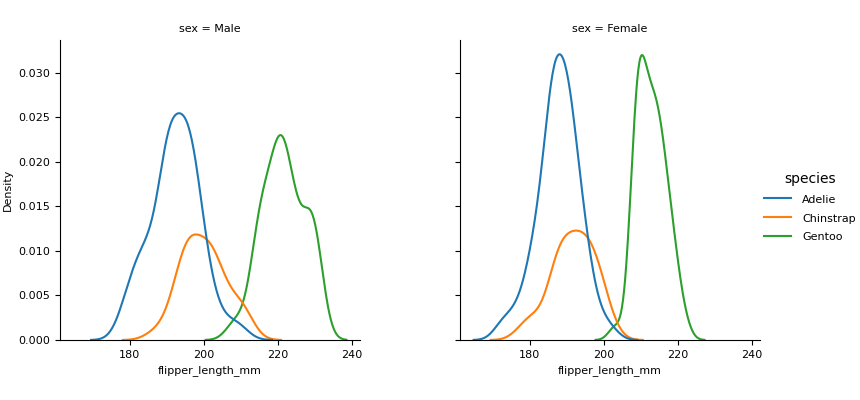

In [58]:
col = "sex"
a = penguins[col].dropna().unique()

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")

for i, item in enumerate(a):
    ax = c.add_axis(item, Point((4*i+0.6), .6, "in"), Point((4*i+3.6), 3.6, "in"))
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.kdeplot(data=penguins[penguins[col]==item], x="flipper_length_mm", hue="species", ax=ax, legend=leg)

    sns.despine(ax=ax)
    
    ax.set_title(f"{col} = {item}")
    
    if i>0:
        # sharey, take the first axis and sharey with the last plotted one
        c.ax(a[i]).sharey(c.ax(a[0]))
        c.ax(a[i]).sharex(c.ax(a[0]))
        # need to rescale all axis
        c.ax(a[i]).autoscale()        

        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
        # remove ylabel
        ax.set_ylabel('')     

# position the legend
ax.legend_.set_bbox_to_anchor((.97, 0.6))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

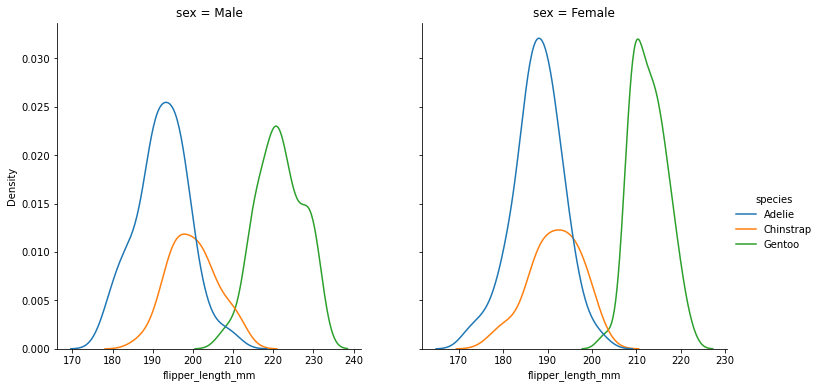

In [59]:
col = "sex"
a = penguins[col].dropna().unique()

fig, axs = plt.subplots(1,len(a), figsize=(len(a)*6, 6), sharey=True)

for item, ax in zip(a, axs.flatten()):
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.kdeplot(data=penguins[penguins[col]==item], x="flipper_length_mm", hue="species", ax=ax, legend=leg)

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{col} = {item}")

ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

#### 11

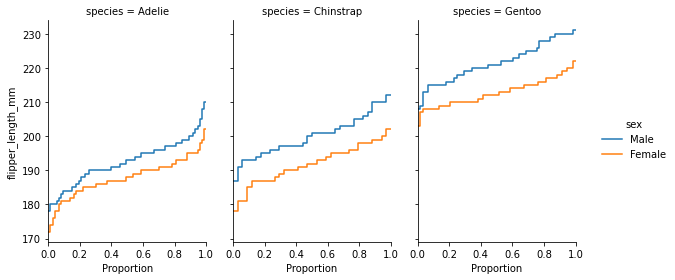

In [60]:
sns.displot(
    data=penguins, y="flipper_length_mm", hue="sex", col="species",
    kind="ecdf", height=4, aspect=.7,
)


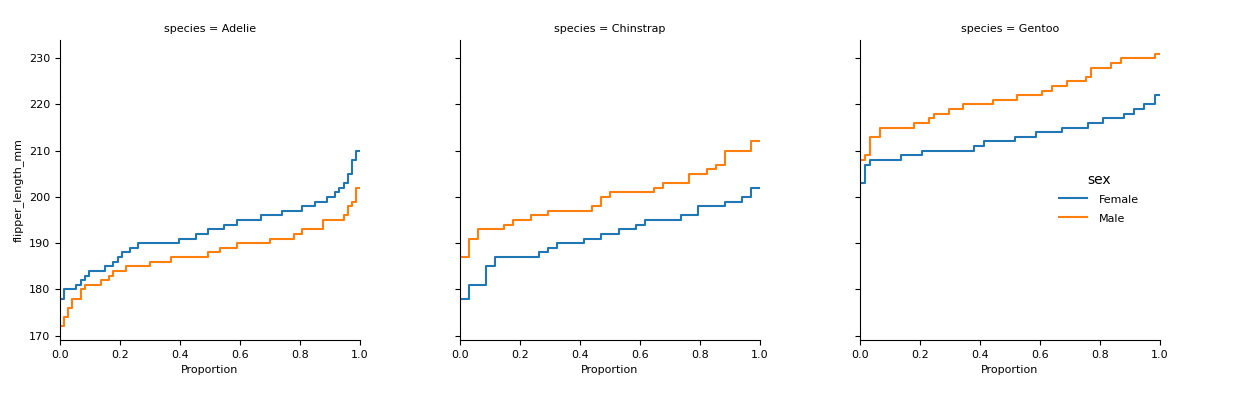

In [61]:
col = "species"
a = penguins[col].dropna().unique()

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")

for i, item in enumerate(a):
    ax = c.add_axis(item, Point((4*i+0.6), .6, "in"), Point((4*i+3.6), 3.6, "in"))
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.ecdfplot(data=penguins[penguins[col]==item], y="flipper_length_mm", hue="sex", ax=ax, legend=leg)
    sns.despine(ax=ax)
    # add a subplot title
    ax.set_title(f"{col} = {item}")
    if i>0:
        # sharey, take the before last axis and sharey with the last plotted one, cannot share 2 axis
        c.ax(a[i]).sharey(c.ax(a[i-1])) 
        # need to rescale all axis
        c.ax(a[i]).autoscale()

        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
        # remove ylabel
        ax.set_ylabel('')    

# position the legend
ax.legend_.set_bbox_to_anchor((.97, 0.6))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

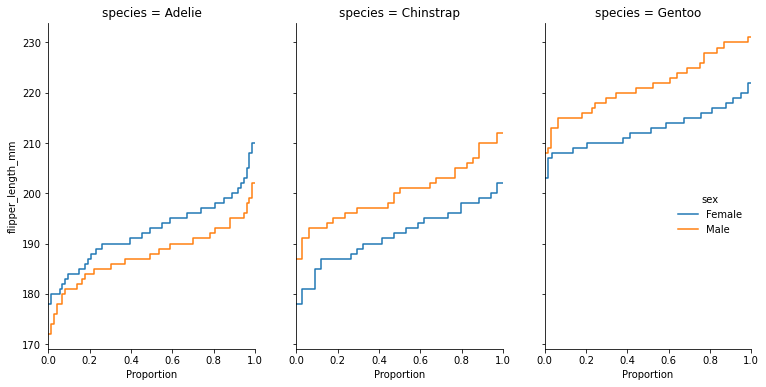

In [62]:
col = "species"
a = penguins[col].dropna().unique()
aspect=.7

fig, axs = plt.subplots(1,len(a), figsize=(len(a)*6*aspect, 6), sharey=True)

for item, ax in zip(a, axs.flatten()):
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.ecdfplot(data=penguins[penguins[col]==item], y="flipper_length_mm", hue="sex", ax=ax, legend=leg)

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{col} = {item}")

ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')


#### 12

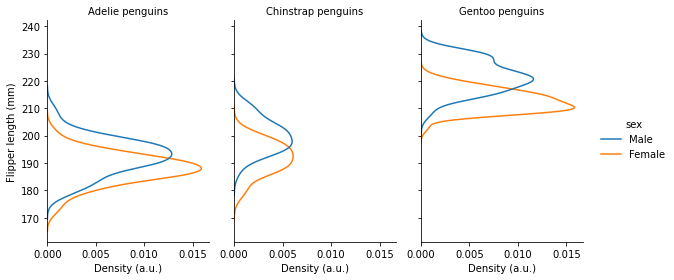

In [63]:
g = sns.displot(
    data=penguins, y="flipper_length_mm", hue="sex", col="species",
    kind="kde", height=4, aspect=.7,
)
g.set_axis_labels("Density (a.u.)", "Flipper length (mm)")
g.set_titles("{col_name} penguins")

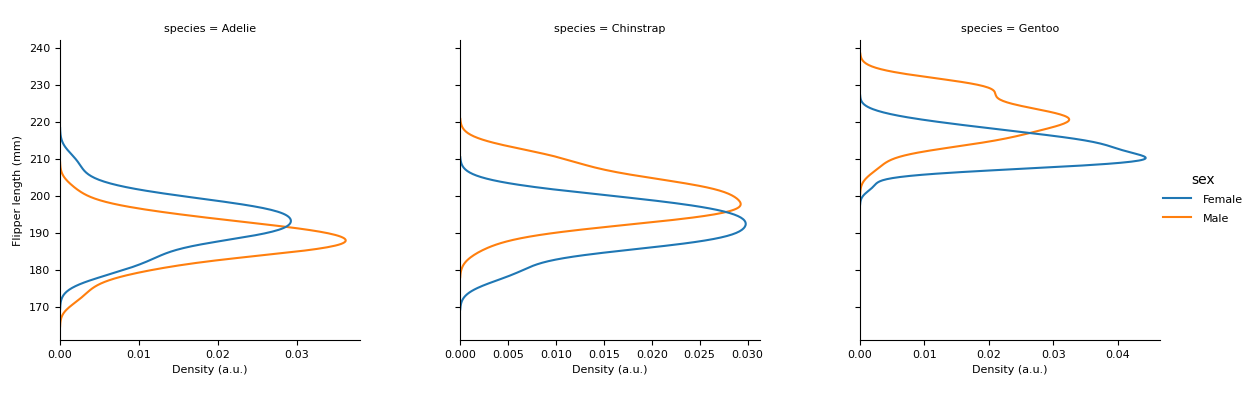

In [64]:
col = "species"
a = penguins[col].dropna().unique()

# CanD
c = Canvas((4*len(a)+0.6), 4, "in")

for i, item in enumerate(a):
    ax = c.add_axis(item, Point((4*i+0.6), .6, "in"), Point((4*i+3.6), 3.6, "in"))
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.kdeplot(data=penguins[penguins[col]==item], y="flipper_length_mm", hue="sex", ax=ax, legend=leg)
    sns.despine(ax=ax)
    # add a subplot title
    ax.set_title(f"{col} = {item}")
    ax.set_xlabel("Density (a.u.)")
    ax.set_ylabel("Flipper length (mm)")    
    if i>0:
        # sharey, take the before last axis and sharey with the last plotted one, cannot share 2 axis
#         c.ax(a[i]).sharey(c.ax(a[i-1]))
        c.ax(a[i]).sharey(c.ax(a[0]))
        # need to rescale all axis
        c.ax(a[i]).autoscale()

        # remove ticks from shared y axes
        plt.setp(ax.get_yticklabels(), visible=False)
        # remove ylabel
        ax.set_ylabel('')     

# position the legend
ax.legend_.set_bbox_to_anchor((.97, 0.6))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

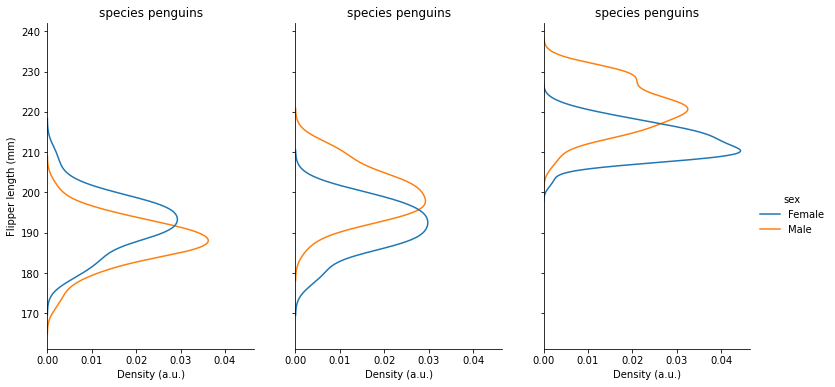

In [65]:
col = "species"
a = penguins[col].dropna().unique()
aspect=.7

fig, axs = plt.subplots(1,len(a), figsize=(len(a)*6*aspect, 6), sharey=True, sharex=True)

for item, ax in zip(a, axs.flatten()):
    
    # plot only the last legend
    if item == a[-1]:
        leg = True
    else:
        leg = False    
    
    sns.kdeplot(data=penguins[penguins[col]==item], y="flipper_length_mm", hue="sex", ax=ax, legend=leg)

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{col} penguins")
    ax.set_xlabel("Density (a.u.)")
    ax.set_ylabel("Flipper length (mm)")
    

ax.legend_.set_bbox_to_anchor((1.4, 0.5))
# remove the border, https://stackoverflow.com/questions/25540259/remove-or-adapt-border-of-frame-of-legend-using-matplotlib
ax.legend_.get_frame().set_edgecolor('none')



## Regression plots

https://seaborn.pydata.org/api.html#regression-plots

[Content](#Content) (top)

### Regplot

https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot

#### 1

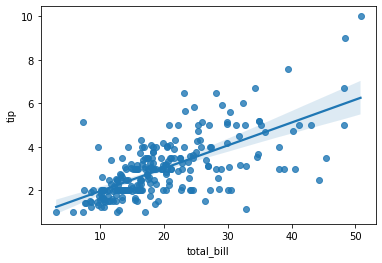

In [66]:
ax = sns.regplot(x="total_bill", y="tip", data=tips)

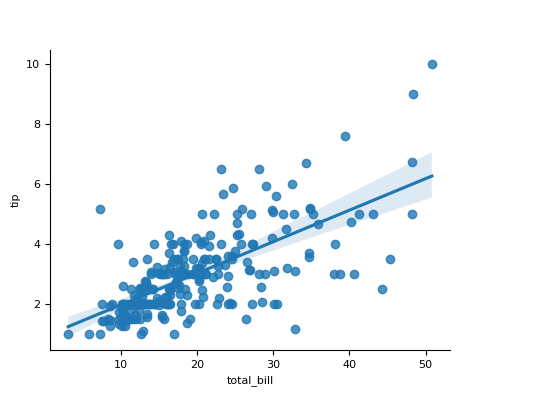

In [67]:
# CanD way

# Create a canvas 5.6 in x 4 in.
c = Canvas(5.6, 4, "in")

# alternative one-liner
ax = c.add_axis("scatter", Point(.5, .5, "in"), Point(4.5, 3.5, "in"))

sns.regplot(x="total_bill", y="tip", data=tips, ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

#### 2

In [68]:
import numpy as np; np.random.seed(8)

mean, cov = [4, 6], [(1.5, .7), (.7, 1)]

x, y = np.random.multivariate_normal(mean, cov, 80).T

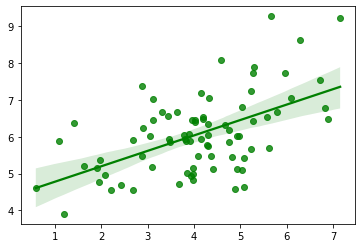

In [69]:
ax = sns.regplot(x=x, y=y, color="g")

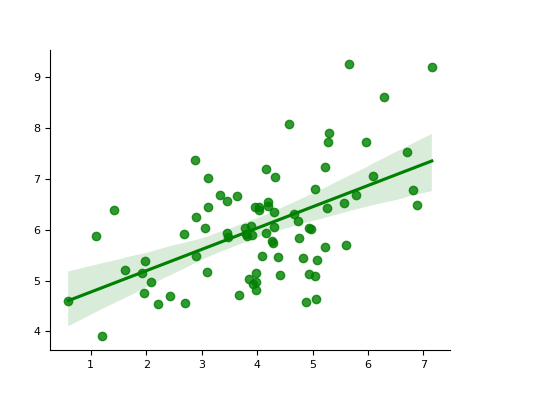

In [70]:
# CanD way

# Create a canvas 5.6 in x 4 in.
c = Canvas(5.6, 4, "in")

# alternative one-liner
ax = c.add_axis("scatter", Point(.5, .5, "in"), Point(4.5, 3.5, "in"))

sns.regplot(x=x, y=y, color="g", ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

#### 3

In [71]:
import pandas as pd

x, y = pd.Series(x, name="x_var"), pd.Series(y, name="y_var")

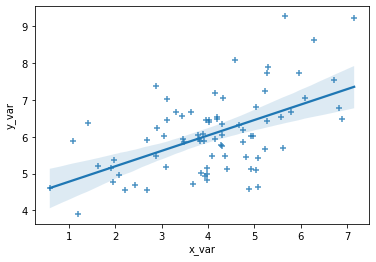

In [72]:
ax = sns.regplot(x=x, y=y, marker="+")

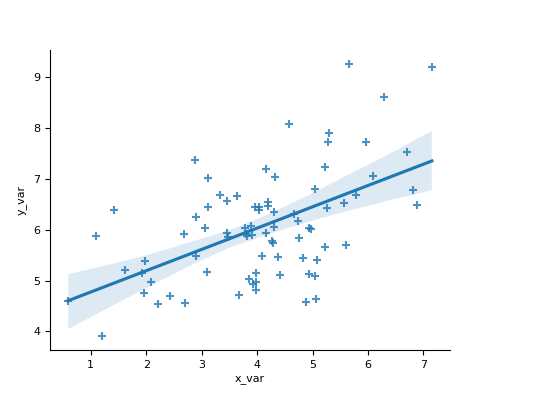

In [73]:
# CanD way

# Create a canvas 5.6 in x 4 in.
c = Canvas(5.6, 4, "in")

# alternative one-liner
ax = c.add_axis("scatter", Point(.5, .5, "in"), Point(4.5, 3.5, "in"))

sns.regplot(x=x, y=y, marker="+", ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

#### 4

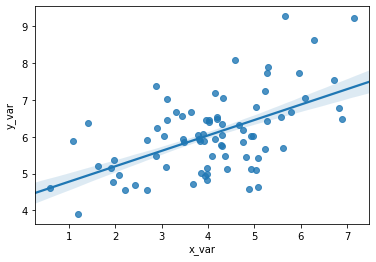

In [74]:
ax = sns.regplot(x=x, y=y, ci=68, truncate=False)

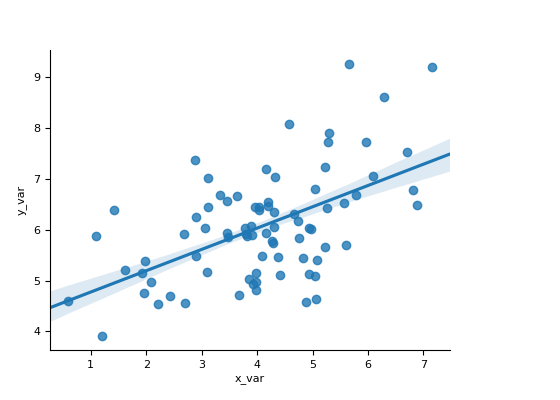

In [75]:
# CanD way

# Create a canvas 5.6 in x 4 in.
c = Canvas(5.6, 4, "in")

# alternative one-liner
ax = c.add_axis("scatter", Point(.5, .5, "in"), Point(4.5, 3.5, "in"))

sns.regplot(x=x, y=y, ci=68, truncate=False, ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

#### 5

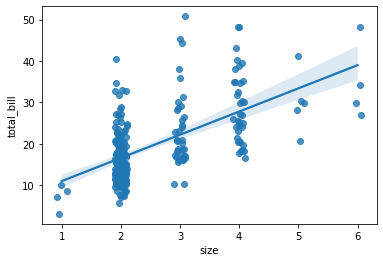

In [76]:
ax = sns.regplot(x="size", y="total_bill", data=tips, x_jitter=.1)

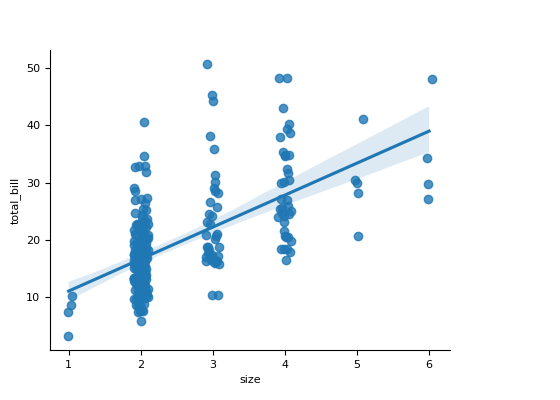

In [77]:
# CanD way

# Create a canvas 5.6 in x 4 in.
c = Canvas(5.6, 4, "in")

# alternative one-liner
ax = c.add_axis("scatter", Point(.5, .5, "in"), Point(4.5, 3.5, "in"))

sns.regplot(x="size", y="total_bill", data=tips, x_jitter=.1, ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

#### 6

<AxesSubplot:xlabel='size', ylabel='total_bill'>

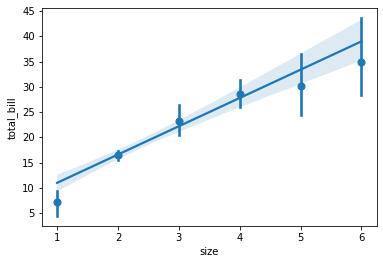

In [78]:
sns.regplot(x="size", y="total_bill", data=tips, x_estimator=np.mean)

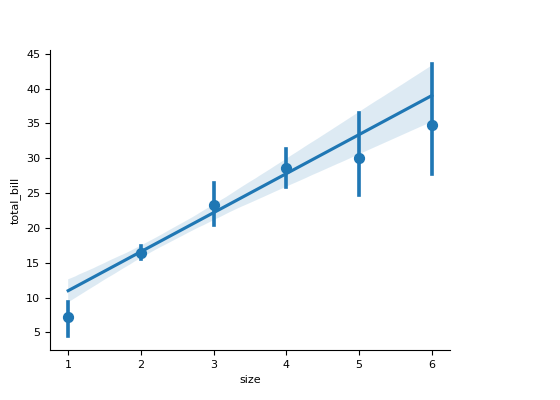

In [79]:
# CanD way

# Create a canvas 5.6 in x 4 in.
c = Canvas(5.6, 4, "in")

# alternative one-liner
ax = c.add_axis("scatter", Point(.5, .5, "in"), Point(4.5, 3.5, "in"))

sns.regplot(x="size", y="total_bill", data=tips, x_estimator=np.mean, ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

#### 7

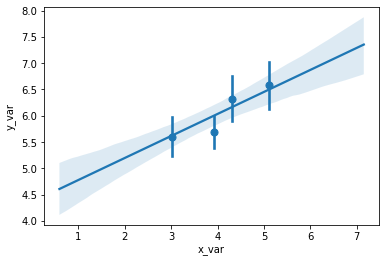

In [80]:
ax = sns.regplot(x=x, y=y, x_bins=4)

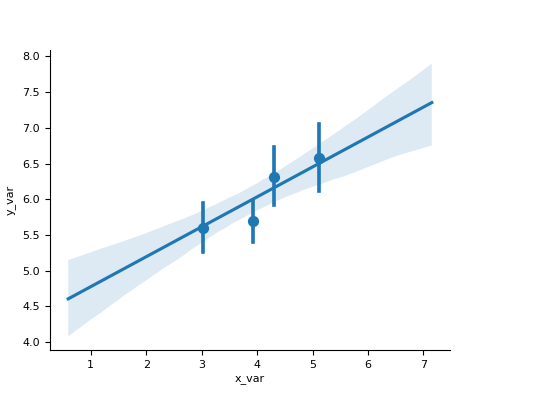

In [81]:
# CanD way

# Create a canvas 5.6 in x 4 in.
c = Canvas(5.6, 4, "in")

# alternative one-liner
ax = c.add_axis("scatter", Point(.5, .5, "in"), Point(4.5, 3.5, "in"))

sns.regplot(x=x, y=y, x_bins=4, ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

#### 8

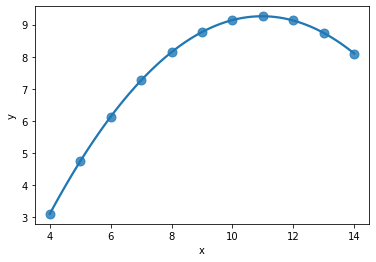

In [82]:
ans = sns.load_dataset("anscombe")

ax = sns.regplot(x="x", y="y", data=ans.loc[ans.dataset == "II"],
                 scatter_kws={"s": 80},
                 order=2, ci=None)

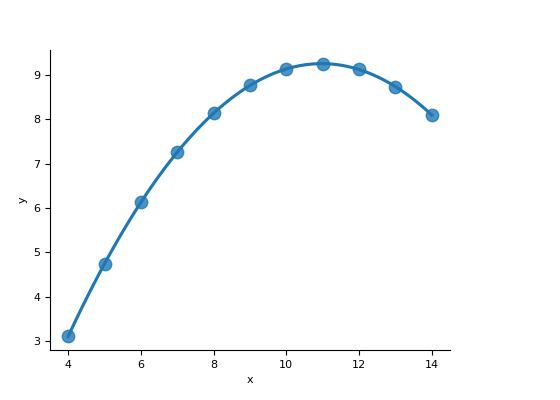

In [83]:
# CanD way

# Create a canvas 5.6 in x 4 in.
c = Canvas(5.6, 4, "in")

# alternative one-liner
ax = c.add_axis("scatter", Point(.5, .5, "in"), Point(4.5, 3.5, "in"))

sns.regplot(x="x", y="y", data=ans.loc[ans.dataset == "II"],
                 scatter_kws={"s": 80},
                 order=2, ci=None, ax=ax)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

#### 9

<AxesSubplot:xlabel='x', ylabel='y'>

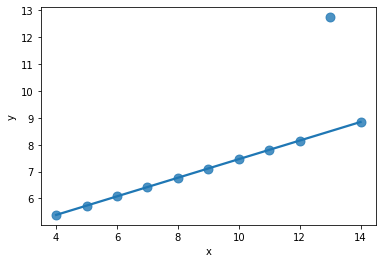

In [84]:
sns.regplot(x="x", y="y", data=ans.loc[ans.dataset == "III"],
            scatter_kws={"s": 80}, robust=True, ci=None)

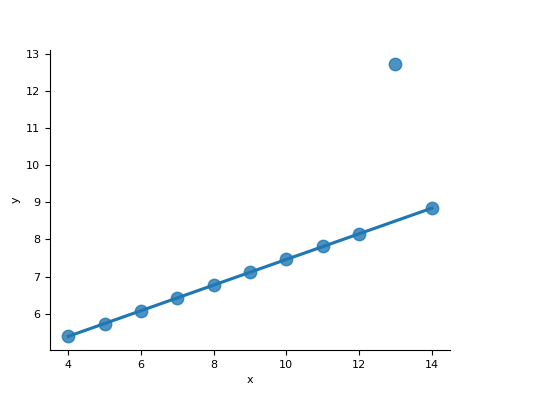

In [85]:
# CanD way

# Create a canvas 5.6 in x 4 in.
c = Canvas(5.6, 4, "in")

# alternative one-liner
ax = c.add_axis("scatter", Point(.5, .5, "in"), Point(4.5, 3.5, "in"))

sns.regplot(x="x", y="y", data=ans.loc[ans.dataset == "III"],
            scatter_kws={"s": 80}, robust=True, ci=None, ax=ax)

# remove the left and top spine
sns.despine(ax=ax)

c.show()

#### 10

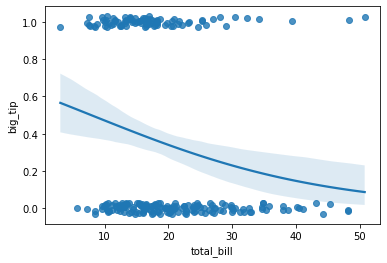

In [86]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .175

ax = sns.regplot(x="total_bill", y="big_tip", data=tips, logistic=True, n_boot=500, y_jitter=.03)

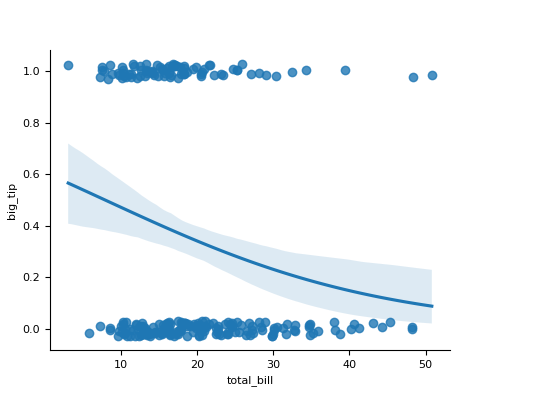

In [87]:
# CanD way

# Create a canvas 5.6 in x 4 in.
c = Canvas(5.6, 4, "in")

# alternative one-liner
ax = c.add_axis("scatter", Point(.5, .5, "in"), Point(4.5, 3.5, "in"))

sns.regplot(x="total_bill", y="big_tip", data=tips, logistic=True, n_boot=500, y_jitter=.03, ax=ax)

# remove the left and top spine
sns.despine(ax=ax)

c.show()

#### 12

<AxesSubplot:xlabel='size', ylabel='total_bill'>

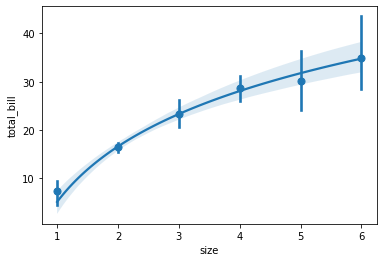

In [88]:
sns.regplot(x="size", y="total_bill", data=tips, x_estimator=np.mean, logx=True)

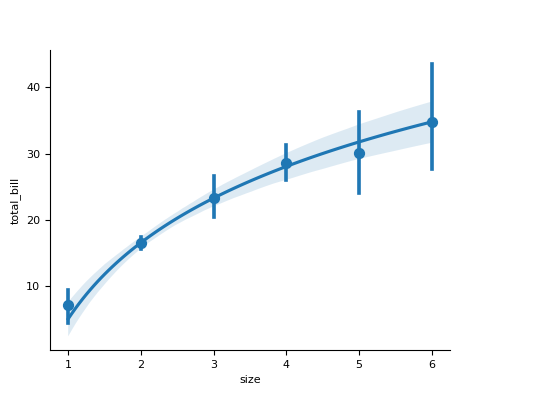

In [89]:
# CanD way

# Create a canvas 5.6 in x 4 in.
c = Canvas(5.6, 4, "in")

# alternative one-liner
ax = c.add_axis("scatter", Point(.5, .5, "in"), Point(4.5, 3.5, "in"))

sns.regplot(x="size", y="total_bill", data=tips, x_estimator=np.mean, logx=True, ax=ax)

# remove the left and top spine
sns.despine(ax=ax)

c.show()

### LMplot

[Content](#Content) (top)

https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot

#### 1

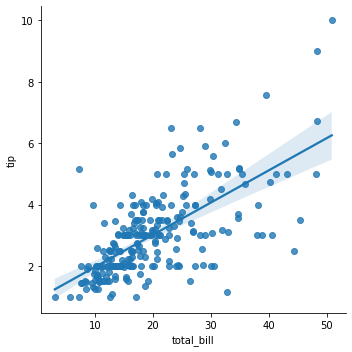

In [90]:
g = sns.lmplot(x="total_bill", y="tip", data=tips)

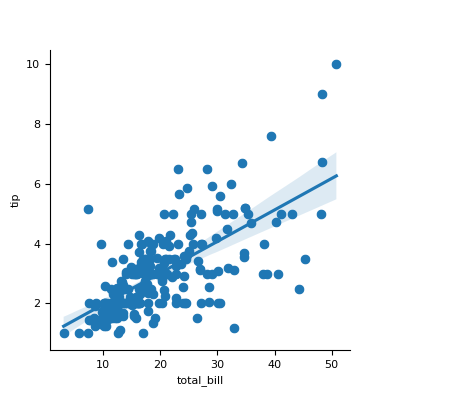

In [91]:
# CanD way

# Create a canvas 6 in x 6 in.
c = Canvas(4.6, 4, "in")

# alternative one-liner
ax = c.add_axis("scatter", Point(.5, .5, "in"), Point(3.5, 3.5, "in"))

sns.regplot(x="total_bill", y="tip", data=tips, ax=ax)
sns.scatterplot(x="total_bill", y="tip", data=tips, ax=ax, edgecolor=None)
# remove the left and top spine
sns.despine(ax=ax)

c.show()

#### 2

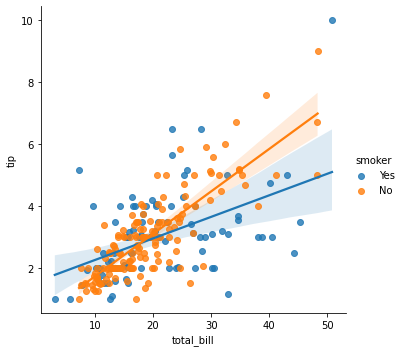

In [92]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

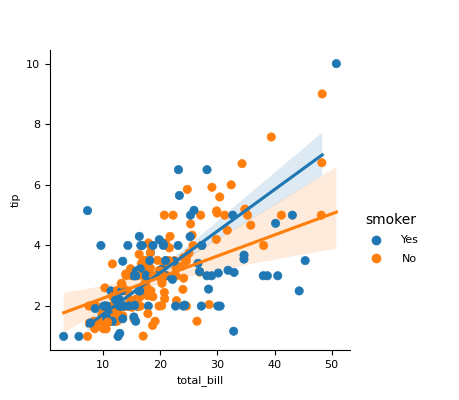

In [93]:
# CanD way

hue="smoker"

# Create a canvas 6 in x 6 in.
c = Canvas(4.6, 4, "in")

# alternative one-liner
ax = c.add_axis("scatter", Point(.5, .5, "in"), Point(3.5, 3.5, "in"))

for h in tips[hue].unique():
    sns.regplot(x="total_bill", y="tip", data=tips[tips[hue]==h], ax=ax, scatter=False)
    
sns.scatterplot(x="total_bill", y="tip", hue=hue, data=tips, ax=ax, edgecolor=None)
# remove the left and top spine
sns.despine(ax=ax)

# Adjust the legend position
ax.legend_.set_bbox_to_anchor((1, 0.5))
ax.legend_.get_frame().set_edgecolor('none')

c.show()

In [94]:
%load_ext watermark
%watermark -n -u -v -iv -w

numpy   1.19.1
seaborn 0.11.2
pandas  1.2.4
last updated: Sun Nov 28 2021 

CPython 3.8.11
IPython 7.26.0
watermark 2.0.2
